# Project 1 - Buffalo 311 Open Data Analysis
---
DAT 512 Canisius College <br>
Kelsey Dayer <br>
<br>

### Analysis Question
Ticket reason trends
<br>

### Sections
- [Importing the Data](#importing-data)
- [Data Cleaning and Manipulation](#data-cleaning)
- [Ticket Reason Trends According to Neighborhood](#neighborhood-trends)
- [Ticket Reason Trends According to Datetime](#datetime-trends)

In [2]:
import numpy as np
import requests
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
pd.options.display.max_colwidth = 75
pd.options.display.max_columns = 20
np.set_printoptions(precision=4, suppress=True)

<a id='importing_data'></a>
# Importing the Data

In [3]:
#read in the 311 Service Call data
#imported using API

uri = 'https://data.buffalony.gov/resource/whkc-e5vr.json'

params_dict = {
    '$limit':2000000
}

r = requests.get(uri, params = params_dict)
print('Status code ',r.status_code)
print('Number of rows returned ',len(r.json()))
print('Endoced URI with params ',r.url)

Status code  200
Number of rows returned  1031259
Endoced URI with params  https://data.buffalony.gov/resource/whkc-e5vr.json?%24limit=2000000


In [4]:
buffData = pd.DataFrame(r.json())
print(buffData.shape)

(1031259, 48)


In [5]:
buffData.head()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,:@computed_region_eziv_p4ck,:@computed_region_jdfw_hhbp,:@computed_region_urdz_b6n8,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_ff6v_jbaa,:@computed_region_gkva_sjqs,:@computed_region_h7a8_iwt4,address_line_2,:@computed_region_k9un_h6vm
0,509589-1001799765,2023-02-12T12:00:00.000,2023-02-25T10:39:00.000,Closed,DPIS,Housing,Open311 Housing,Property,86,AUSTIN,...,72,18,1,2,26,88,277,10,NaN,NaN
1,1001788769,2023-02-07T15:04:00.000,2023-02-14T10:35:00.000,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,1358,BROADWAY,...,66,2,11,1,24,70,266,2,NaN,NaN
2,1001760699,2023-01-03T12:06:00.000,2023-01-26T12:56:00.000,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Madison St,...,60,8,10,1,35,47,50,4,Peckham St,NaN
3,1001787887,2023-02-02T10:53:00.000,2023-02-22T08:27:00.000,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,464,FERRY EAST,...,59,7,6,4,21,11,283,8,NaN,3
4,506083-1001764175,2023-01-12T13:30:00.000,2023-01-17T08:08:00.000,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,201,BROADWAY,...,20,15,9,5,8,84,5,4,NaN,NaN


<a id='data-cleaning'></a>
# Data Cleaning and Manipulation

In [6]:
pd.isna(buffData)

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,:@computed_region_eziv_p4ck,:@computed_region_jdfw_hhbp,:@computed_region_urdz_b6n8,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_ff6v_jbaa,:@computed_region_gkva_sjqs,:@computed_region_h7a8_iwt4,address_line_2,:@computed_region_k9un_h6vm
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031254,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1031255,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1031256,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1031257,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [7]:
#creating categorical variables
buffData.columns

Index(['case_reference', 'open_date', 'closed_date', 'status', 'subject',
       'reason', 'type', 'object_type', 'address_number', 'address_line_1',
       'city', 'state', 'zip_code', 'property_id', 'location', 'latitude',
       'longitude', 'council_district', 'police_district', 'census_tract',
       'census_block_group', 'census_block', 'neighborhood', 'x_coordinate',
       'y_coordinate', 'census_tract_2010', 'census_block_group_2010',
       'census_block_2010', 'tractce20', 'geoid20_tract', 'geoid20_blockgroup',
       'geoid20_block', ':@computed_region_fk4y_hpmh',
       ':@computed_region_kwzn_pe6v', ':@computed_region_uh5x_q5mi',
       ':@computed_region_dwzh_dtk5', ':@computed_region_tmcg_v66k',
       ':@computed_region_xbxg_7ifr', ':@computed_region_eziv_p4ck',
       ':@computed_region_jdfw_hhbp', ':@computed_region_urdz_b6n8',
       ':@computed_region_vsen_jbmg', ':@computed_region_nmyf_6jtp',
       ':@computed_region_ff6v_jbaa', ':@computed_region_gkva_sjqs',
   

In [14]:
buffData['status']=buffData['status'].astype('category')
buffData['subject']=buffData['subject'].astype('category')
buffData['reason']=buffData['reason'].astype('category')
buffData['object_type']=buffData['object_type'].astype('category')
buffData['council_district']=buffData['council_district'].astype('category')
buffData['police_district']=buffData['police_district'].astype('category')
buffData['neighborhood']=buffData['neighborhood'].astype('category')

In [15]:
buffData.dtypes

case_reference                   object
open_date                        object
closed_date                      object
status                         category
subject                        category
reason                         category
type                           category
object_type                    category
address_number                   object
address_line_1                   object
city                             object
state                            object
zip_code                         object
property_id                      object
location                         object
latitude                         object
longitude                        object
council_district               category
police_district                category
census_tract                     object
census_block_group               object
census_block                     object
neighborhood                   category
x_coordinate                     object
y_coordinate                     object


In [19]:
buffData['reason'].value_counts()

Sanitation                                     320370
Housing                                        177912
Streets                                         90745
Engineering - Street Repairs                    90168
Parking Violations Bureau                       55527
Police                                          49188
Forestry                                        44827
Rodent Control                                  39144
National Grid                                   34990
Engineering - Traffic                           25704
Animal Shelter                                  21985
Buffalo Sewer Authority                         13976
Rodent_Pest Control                             11861
Buffalo Water Authority                          8735
Citizen Services - Quick Response Teams          5796
City Parks                                       5465
Real Estate                                      5338
Adjudication - Ordinance Violation               3539
Citizen Services - Save Our 

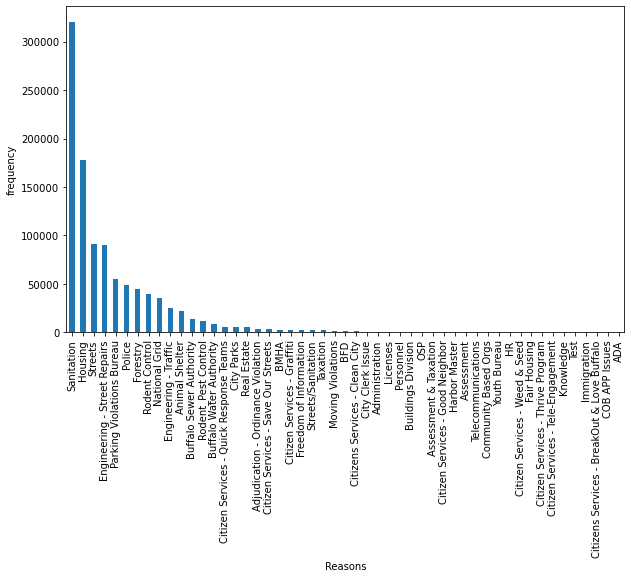

In [30]:
buffData['reason'].value_counts().plot(kind='bar', xlabel='Reasons', ylabel='frequency')

plt.show()

In [52]:
#take out any reasons that make up less than 1% of all reasons

threshold_percent = 1
series = pd.value_counts(buffData['reason'])
mask = (series / series.sum() * 100).lt(threshold_percent)
buffReasons = buffData.assign(reason = np.where(buffData['reason'].isin(series[mask].index),'Other', buffData['reason']))

In [53]:
buffReasons['reason'].value_counts()

Sanitation                      320370
Housing                         177912
Streets                          90745
Engineering - Street Repairs     90168
Parking Violations Bureau        55527
Other                            54862
Police                           49188
Forestry                         44827
Rodent Control                   39144
National Grid                    34990
Engineering - Traffic            25704
Animal Shelter                   21985
Buffalo Sewer Authority          13976
Rodent_Pest Control              11861
Name: reason, dtype: int64

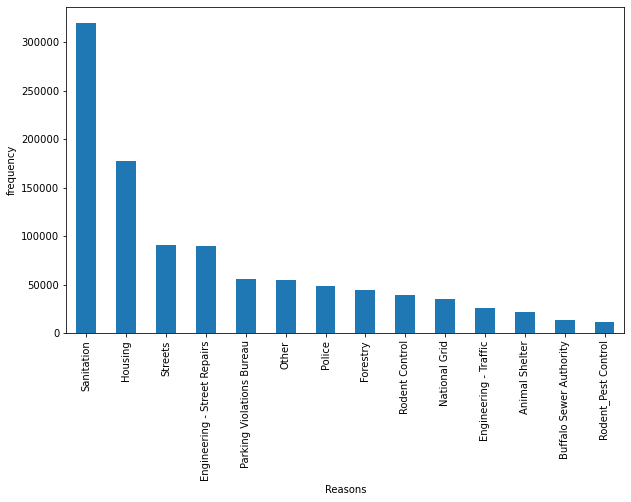

In [54]:
buffReasons['reason'].value_counts().plot(kind='bar', xlabel='Reasons', ylabel='frequency')

plt.show()

After combining the ticket reasons that made up less than 1% of all tickets, 14 categories remain. These 14 categories all have frequencies that would make them significant. 

In [59]:
buffReasons['neighborhood'].value_counts()

UNKNOWN               89157
Broadway Fillmore     58843
North Park            50935
Kensington-Bailey     48560
South Park            45236
Elmwood Bidwell       44330
Genesee-Moselle       42545
Schiller Park         36809
Lovejoy               36210
Riverside             35499
University Heights    35380
Upper West Side       33887
Hopkins-Tifft         33117
Masten Park           32458
West Side             31614
Seneca-Cazenovia      27810
Elmwood Bryant        27656
Fillmore-Leroy        25033
Kenfield              24235
Parkside              23820
Delavan Grider        23492
Kaisertown            22242
Hamlin Park           21333
MLK Park              19052
Central Park          17449
Grant-Amherst         16180
Allentown             15986
Central               15674
Black Rock            14829
Lower West Side       14693
Seneca Babcock        13811
Fruit Belt            12364
West Hertel           11685
Pratt-Willert         11004
First Ward             9879
Ellicott            

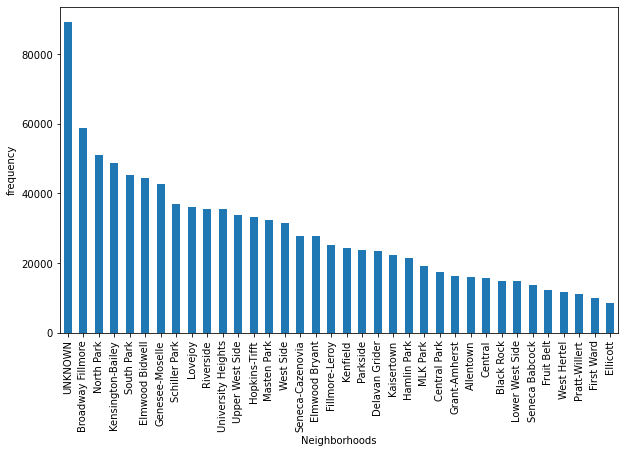

In [56]:
buffReasons['neighborhood'].value_counts().plot(kind='bar', xlabel='Neighborhoods', ylabel='frequency')
plt.show()

A large amount of the tickets are labeled as an unknown neighborhood, but other than that all the neighborhoods have a decent amount of tickets. None of the neighborhoods seem insignificant.

<AxesSubplot:xlabel='reason'>

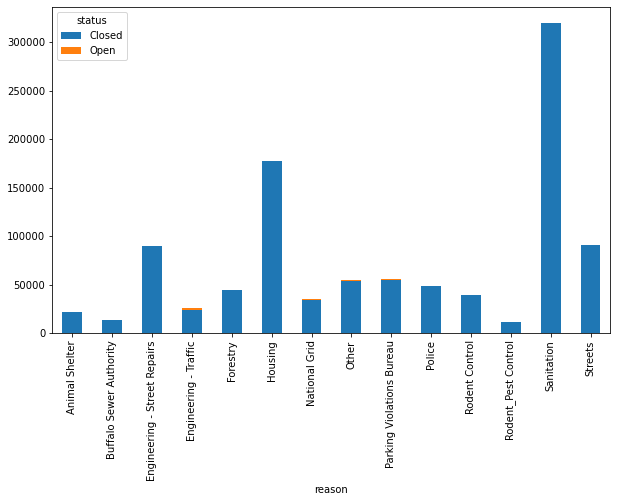

In [107]:
#checking ticket status according to ticket reason

pd.crosstab(buffReasons['reason'], buffReasons['status']).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='neighborhood'>

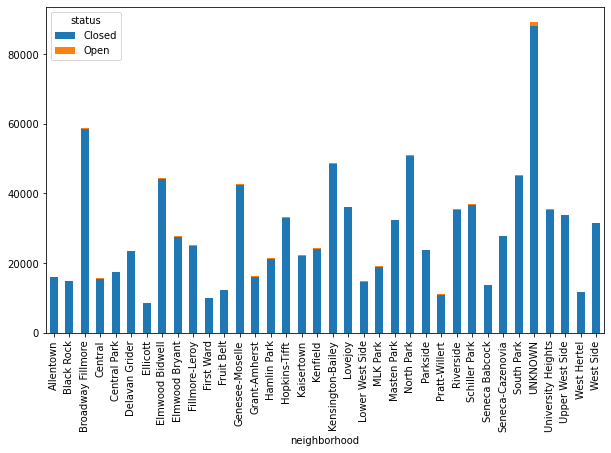

In [108]:
#checking ticket status according to neighborhood

pd.crosstab(buffReasons['neighborhood'], buffReasons['status']).plot(kind='bar', stacked=True)

There is very few tickets with an open status. The ones that are still open do not appear to be of any specific type or in a certain area. This means that open versus closed tickets are not a concern.

<a id='neighborhood-trends'></a>
# Ticket Reason Trends According to Neighborhood

<AxesSubplot:xlabel='Reasons', ylabel='frequency'>

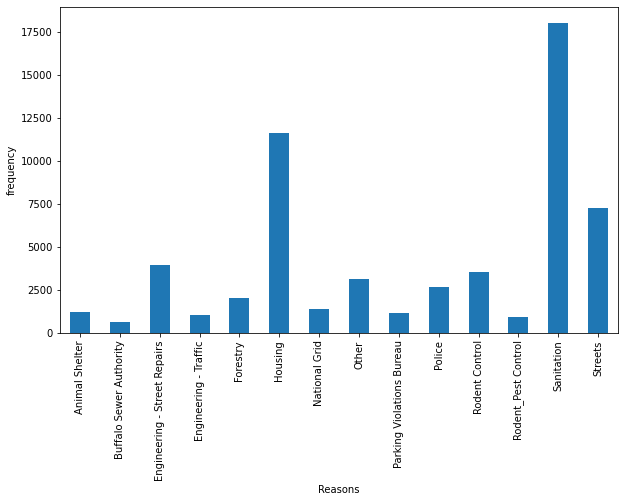

In [111]:
broadFill = buffReasons[buffReasons['neighborhood'] == 'Broadway Fillmore']
broadFill['reason'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Reasons', ylabel='frequency')

In [114]:
broadFill.shape[0]/buffData.shape[0] * 100

5.705938081510077

<AxesSubplot:xlabel='Reasons', ylabel='frequency'>

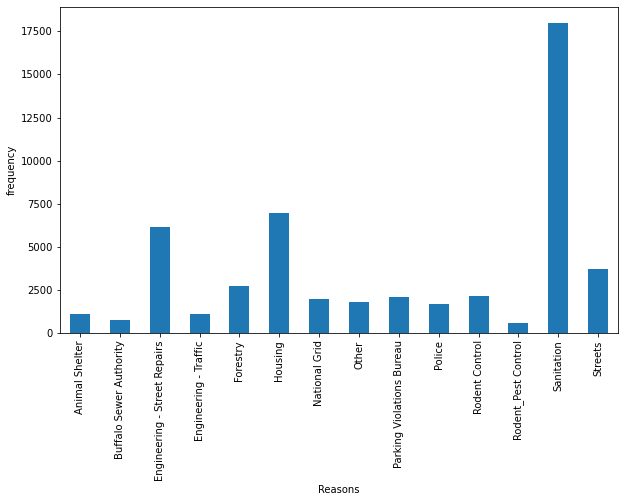

In [91]:
nPark = buffReasons[buffReasons['neighborhood'] == 'North Park']
nPark['reason'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Reasons', ylabel='frequency')

In [115]:
nPark.shape[0]/buffData.shape[0] * 100

4.93910841020539

<AxesSubplot:xlabel='Reasons', ylabel='frequency'>

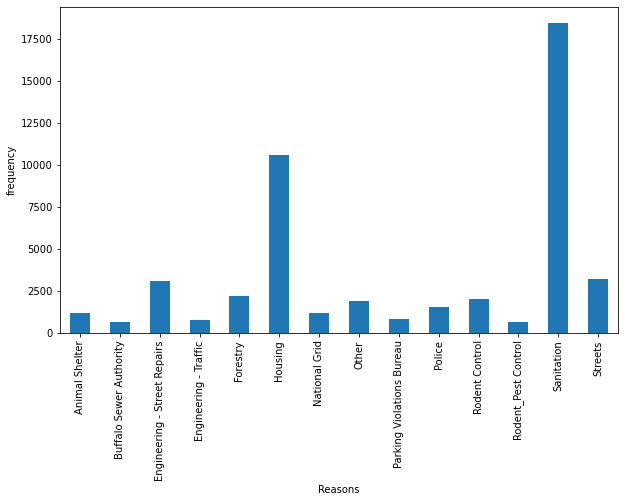

In [92]:
kensBai = buffReasons[buffReasons['neighborhood'] == 'Kensington-Bailey']
kensBai['reason'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Reasons', ylabel='frequency')

In [116]:
kensBai.shape[0]/buffData.shape[0] * 100

4.708807389802174

<AxesSubplot:xlabel='Reasons', ylabel='frequency'>

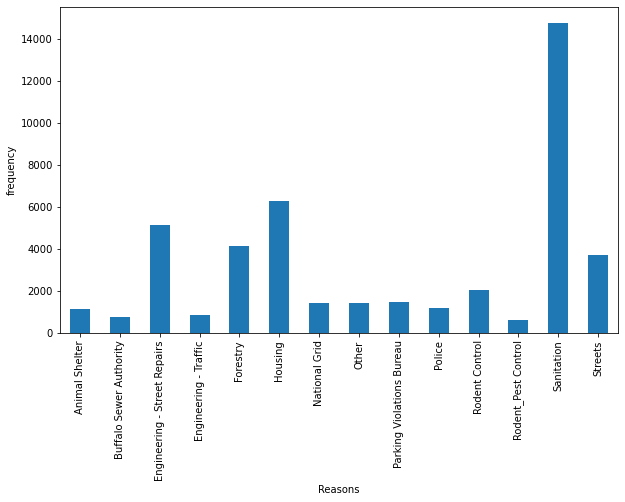

In [93]:
sPark = buffReasons[buffReasons['neighborhood'] == 'South Park']
sPark['reason'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Reasons', ylabel='frequency')

In [117]:
sPark.shape[0]/buffData.shape[0] * 100

4.386482930088368

<AxesSubplot:xlabel='Reasons', ylabel='frequency'>

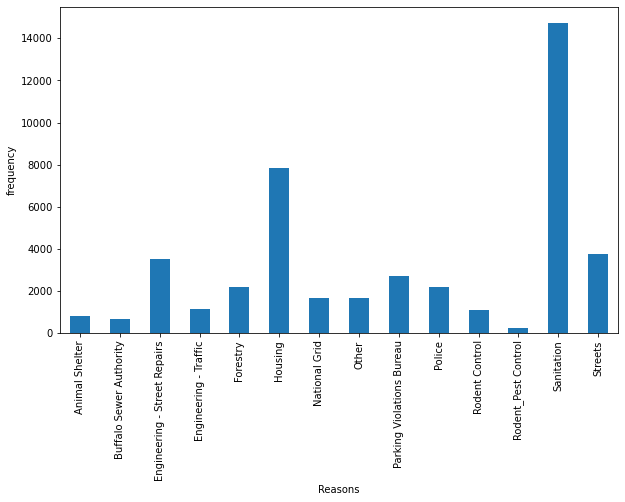

In [94]:
elBid = buffReasons[buffReasons['neighborhood'] == 'Elmwood Bidwell']
elBid['reason'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Reasons', ylabel='frequency')

In [118]:
elBid.shape[0]/buffData.shape[0] * 100

4.2986291513577095

When looking at the top 5 neighborhoods that had the most tickets, the distribution of the ticket reasons appear to be about the same. Sanitation is the top ticket reason for all 5 neighborhoods. Housing tickets are also the second most common. Streets and street repairs are the only other reasons that have any significant value differences from the others. 

<AxesSubplot:xlabel='Reasons', ylabel='frequency'>

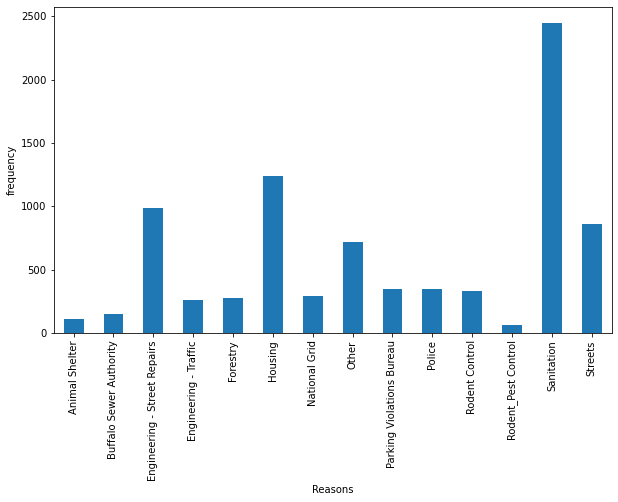

In [95]:
ellicott = buffReasons[buffReasons['neighborhood'] == 'Ellicott']
ellicott['reason'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Reasons', ylabel='frequency')

In [119]:
ellicott.shape[0]/buffData.shape[0] * 100

0.8195807260833602

<AxesSubplot:xlabel='Reasons', ylabel='frequency'>

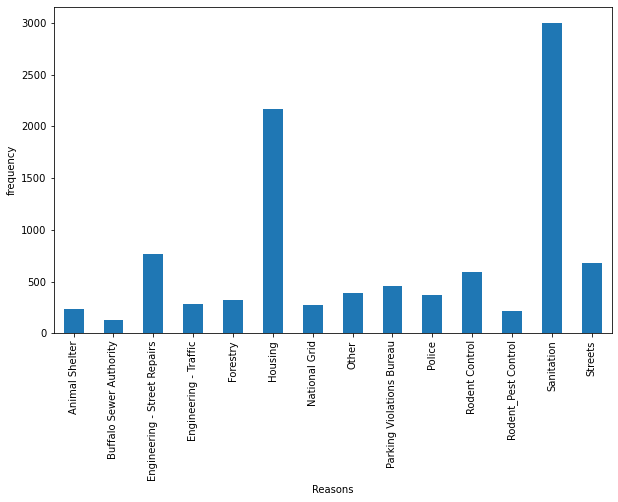

In [96]:
firstWard = buffReasons[buffReasons['neighborhood'] == 'First Ward']
firstWard['reason'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Reasons', ylabel='frequency')

In [120]:
firstWard.shape[0]/buffData.shape[0] * 100

0.957955276026682

<AxesSubplot:xlabel='Reasons', ylabel='frequency'>

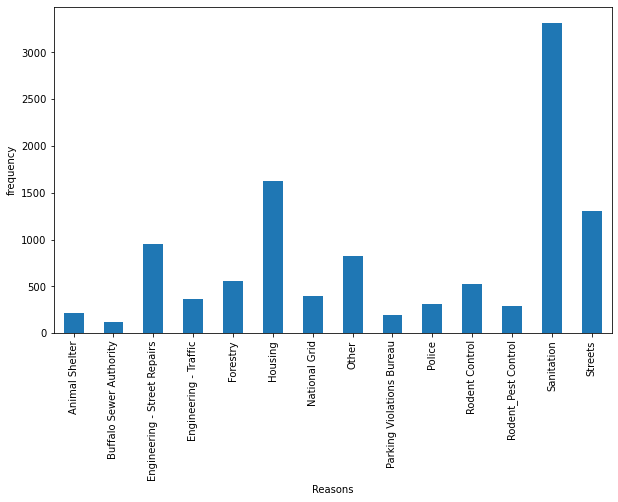

In [97]:
pWill = buffReasons[buffReasons['neighborhood'] == 'Pratt-Willert']
pWill['reason'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Reasons', ylabel='frequency')

In [121]:
pWill.shape[0]/buffData.shape[0] * 100

1.0670452330597844

<AxesSubplot:xlabel='Reasons', ylabel='frequency'>

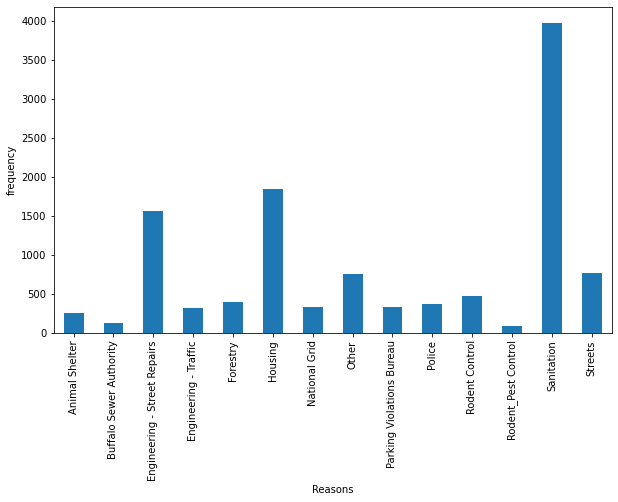

In [98]:
westHert = buffReasons[buffReasons['neighborhood'] == 'West Hertel']
westHert['reason'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Reasons', ylabel='frequency')

In [122]:
westHert.shape[0]/buffData.shape[0] * 100

1.133081020383822

<AxesSubplot:xlabel='Reasons', ylabel='frequency'>

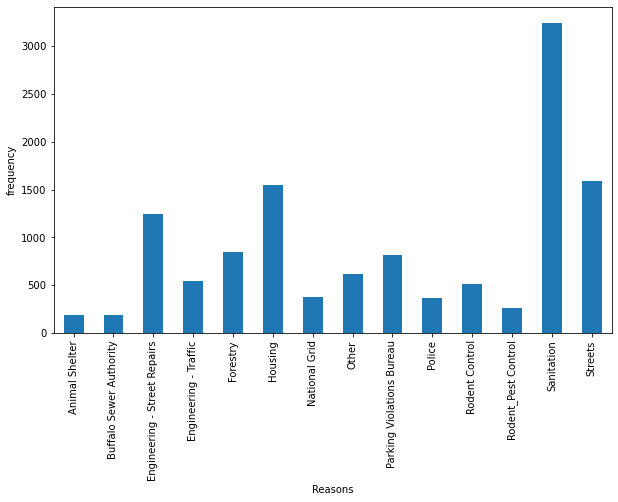

In [99]:
fruitBelt = buffReasons[buffReasons['neighborhood'] == 'Fruit Belt']
fruitBelt['reason'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Reasons', ylabel='frequency')

In [123]:
fruitBelt.shape[0]/buffData.shape[0] * 100

1.1989228700064678

The five neighborhoods with the least amount of ticket submissions have very similar reason distributions to the top five. Sanitation, housing, streets, and street repairs remain the 4 most common ticket reasons. However, since there are less tickets overall the difference between the top reasons and the others are not as high as in the other neighborhoods. 

<AxesSubplot:xlabel='Neighborhoods', ylabel='frequency'>

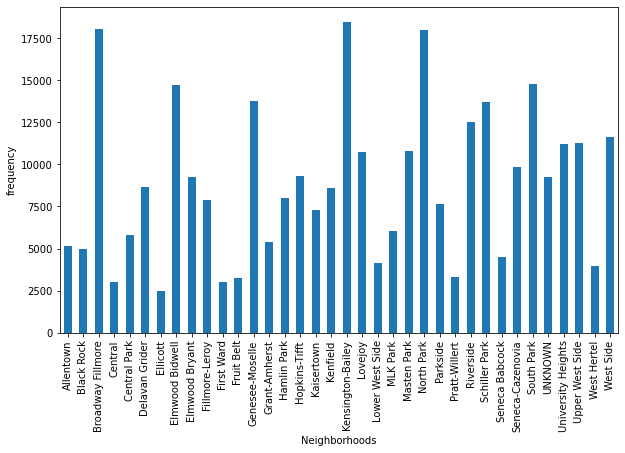

In [100]:
sanitation = buffReasons[buffReasons['reason'] == 'Sanitation']
sanitation['neighborhood'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Neighborhoods', ylabel='frequency')

In [124]:
sanitation.shape[0]/buffData.shape[0] * 100

31.065910697506638

<AxesSubplot:xlabel='Neighborhoods', ylabel='frequency'>

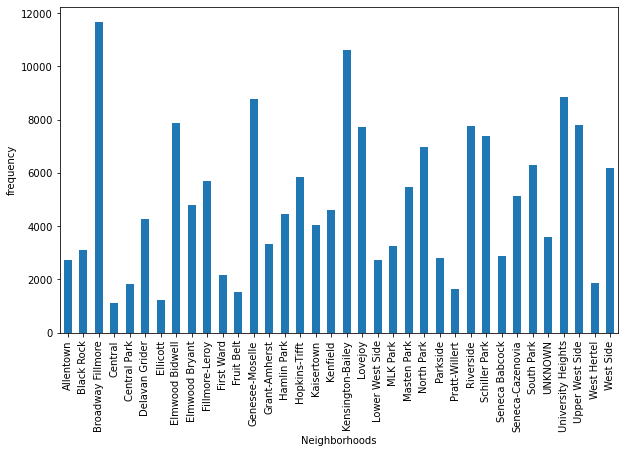

In [101]:
housing = buffReasons[buffReasons['reason'] == 'Housing']
housing['neighborhood'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Neighborhoods', ylabel='frequency')

In [125]:
housing.shape[0]/buffData.shape[0] * 100

17.251922165042924

<AxesSubplot:xlabel='Neighborhoods', ylabel='frequency'>

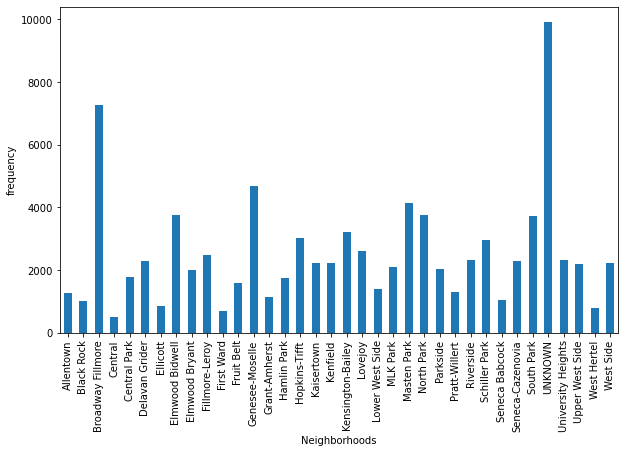

In [102]:
streets = buffReasons[buffReasons['reason'] == 'Streets']
streets['neighborhood'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Neighborhoods', ylabel='frequency')

In [126]:
streets.shape[0]/buffData.shape[0] * 100

8.799438356416768

When looking at the top three overall ticket reasons, it is clear that sanitation makes up the majority of tickets. Although it is not distributed very evenly among the neighborhoods, the frequency of sanitation tickets are still much higher than housing and streets. Housing and Streets appear to have similar distributions, but increasingly smaller frequencies overall. 

<AxesSubplot:xlabel='Neighborhoods', ylabel='frequency'>

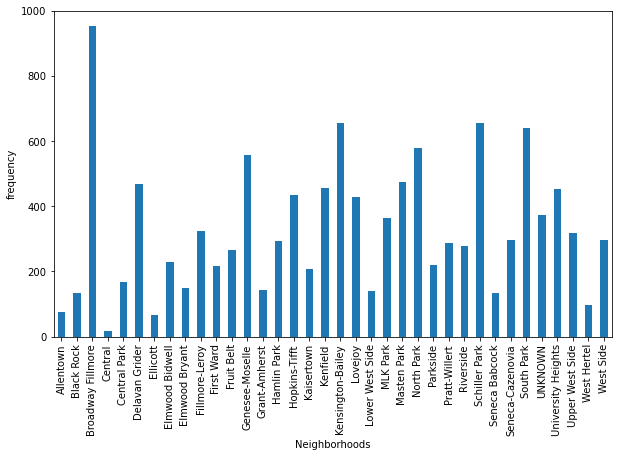

In [105]:
pestControl = buffReasons[buffReasons['reason'] == 'Rodent_Pest Control']
pestControl['neighborhood'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Neighborhoods', ylabel='frequency')

In [127]:
pestControl.shape[0]/buffData.shape[0] * 100

1.1501475381063342

<AxesSubplot:xlabel='Neighborhoods', ylabel='frequency'>

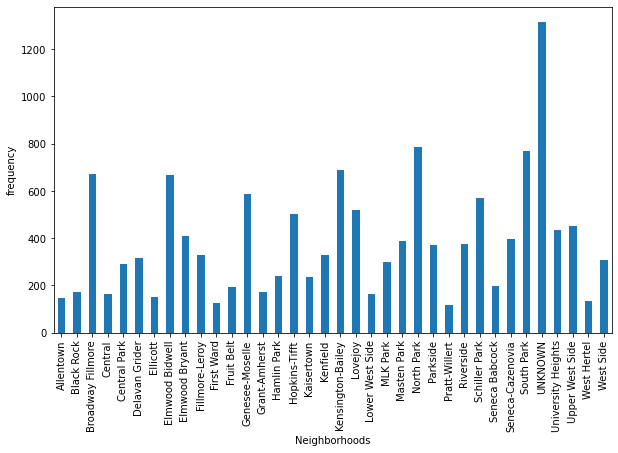

In [104]:
buffSewer = buffReasons[buffReasons['reason'] == 'Buffalo Sewer Authority']
buffSewer['neighborhood'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Neighborhoods', ylabel='frequency')

In [128]:
buffSewer.shape[0]/buffData.shape[0] * 100

1.3552366573285664

<AxesSubplot:xlabel='Neighborhoods', ylabel='frequency'>

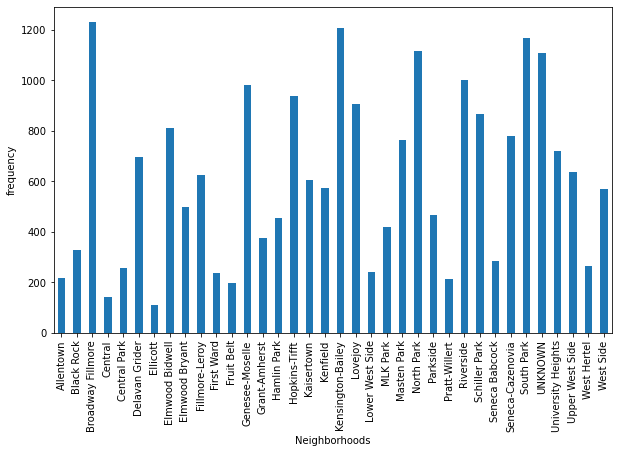

In [106]:
shelter = buffReasons[buffReasons['reason'] == 'Animal Shelter']
shelter['neighborhood'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Neighborhoods', ylabel='frequency')

In [129]:
shelter.shape[0]/buffData.shape[0] * 100

2.1318601825535586

In [175]:
pd.crosstab(buffReasons['reason'], buffReasons['neighborhood'])

neighborhood,Allentown,Black Rock,Broadway Fillmore,Central,Central Park,Delavan Grider,Ellicott,Elmwood Bidwell,Elmwood Bryant,Fillmore-Leroy,...,Riverside,Schiller Park,Seneca Babcock,Seneca-Cazenovia,South Park,UNKNOWN,University Heights,Upper West Side,West Hertel,West Side
reason,,,,,,,,,,,,,,,,,,,,,
Animal Shelter,216,329,1230,143,257,694,110,810,499,623,...,1002,866,282,777,1168,1109,720,636,263,569
Buffalo Sewer Authority,145,173,671,164,290,317,150,667,409,330,...,376,570,196,398,769,1314,433,451,133,306
Engineering - Street Repairs,1692,1468,3955,2122,2257,1283,984,3507,2533,1477,...,2574,2426,1607,1955,5156,11157,2666,1952,1566,1768
Engineering - Traffic,488,241,1074,998,455,454,266,1158,754,601,...,635,606,384,487,884,4096,988,572,319,636
Forestry,659,529,2042,193,1390,1030,278,2221,1410,1020,...,1136,1196,275,1278,4161,3065,1493,1001,407,1470
Housing,2741,3118,11658,1104,1842,4255,1240,7865,4779,5702,...,7752,7397,2870,5120,6309,3601,8847,7782,1853,6169
National Grid,610,355,1409,436,914,576,297,1691,1027,460,...,760,834,326,716,1465,7174,1308,720,336,868
Other,558,759,3159,3898,683,996,720,1684,1111,1375,...,1678,1807,629,1332,1436,7518,1285,1674,763,1494
Parking Violations Bureau,1330,458,1180,2143,396,478,348,2716,1689,602,...,1240,791,383,870,1471,22211,771,1180,331,1452


Plots of the last few ticket reasons don't show much because the frequency of the tickets is very low. The graphs look much more significant than their numbers really are. The neighborhood distribution is also not very different than it was for the much more frequent ticket reasons. 

<a id='datetime-trends'></a>
# Ticket Reason Trends According to Datetime

In [131]:
buffReasons['open_date'] = pd.to_datetime(buffReasons['open_date'])
buffReasons['closed_date'] = pd.to_datetime(buffReasons['closed_date'])

In [134]:
buffReasons.dtypes

case_reference                         object
open_date                      datetime64[ns]
closed_date                    datetime64[ns]
status                               category
subject                              category
reason                                 object
type                                 category
object_type                          category
address_number                         object
address_line_1                         object
city                                   object
state                                  object
zip_code                               object
property_id                            object
location                               object
latitude                               object
longitude                              object
council_district                     category
police_district                      category
census_tract                           object
census_block_group                     object
census_block                      

In [158]:
#create date time parts to facilitate analysis
buffReasons['month'] = buffReasons['open_date'].dt.month_name()
buffReasons['weekDay'] = buffReasons['open_date'].dt.day_name()
buffReasons['year'] = buffReasons['open_date'].dt.year

In [144]:
#find the season of each entry
def find_season(month):    
    season= {
        'December':'Winter', 'January':'Winter', 'February':'Winter',
        'March':'Spring', 'April':'Spring', 'May':'Spring',
        'June':'Summer', 'July':'Summer', 'August':'Summer',
        'September':'Autumn', 'October':'Autumn', 'November':'Autumn'}
    return season.get(month)

season_list = []
for month in buffReasons['month']:
    season = find_season(month)
    season_list.append(season)
    
buffReasons['season'] = season_list

In [148]:
#calculate length of ticket
buffReasons['ticketLength'] = (buffReasons['closed_date'] - buffReasons['open_date']).dt.days

In [159]:
buffReasons.head()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,:@computed_region_ff6v_jbaa,:@computed_region_gkva_sjqs,:@computed_region_h7a8_iwt4,address_line_2,:@computed_region_k9un_h6vm,month,weekDay,season,ticketLength,year
0,509589-1001799765,2023-02-12 12:00:00,2023-02-25 10:39:00,Closed,DPIS,Housing,Open311 Housing,Property,86,AUSTIN,...,88,277,10,NaN,NaN,February,Sunday,Winter,12.0,2023
1,1001788769,2023-02-07 15:04:00,2023-02-14 10:35:00,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,1358,BROADWAY,...,70,266,2,NaN,NaN,February,Tuesday,Winter,6.0,2023
2,1001760699,2023-01-03 12:06:00,2023-01-26 12:56:00,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Madison St,...,47,50,4,Peckham St,NaN,January,Tuesday,Winter,23.0,2023
3,1001787887,2023-02-02 10:53:00,2023-02-22 08:27:00,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,464,FERRY EAST,...,11,283,8,NaN,3,February,Thursday,Winter,19.0,2023
4,506083-1001764175,2023-01-12 13:30:00,2023-01-17 08:08:00,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,201,BROADWAY,...,84,5,4,NaN,NaN,January,Thursday,Winter,4.0,2023


In [151]:
buffReasons['ticketLength'].describe()

count    1.025432e+06
mean     1.125844e+01
std      2.933909e+01
min      0.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      1.200000e+01
max      2.713000e+03
Name: ticketLength, dtype: float64

The average ticket was open for 11 days. The shortest amount of time a ticket was closed in was under 1 day. The longest ticket has been open for 2713 days. On average, each ticket is open for about 29 days more or less than the average. 

In [152]:
buffReasons['month'] = buffReasons['month'].astype('category')
buffReasons['weekDay'] = buffReasons['weekDay'].astype('category')

<AxesSubplot:xlabel='Date', ylabel='Ticket Count'>

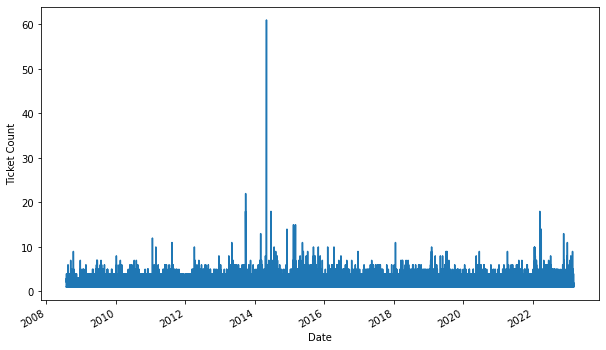

In [155]:
buffReasons['open_date'].value_counts().sort_index(axis=0).plot( xlabel='Date', ylabel='Ticket Count')

C:\Users\kelda\AppData\Local\Temp/ipykernel_14628/3221374891.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearsLimited = yearsLimited[buffReasons['month'] == 'May']


<AxesSubplot:xlabel='Date', ylabel='Ticket Count'>

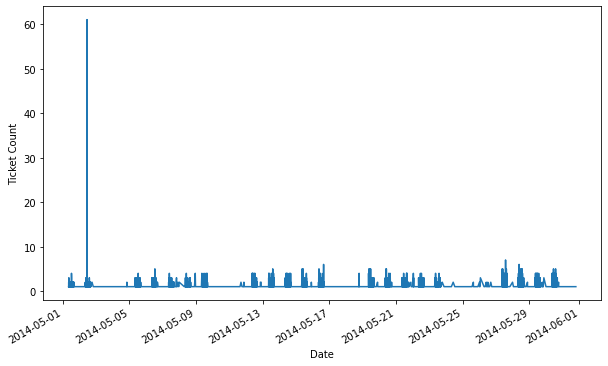

In [165]:
#narrowing to May 2014 to look at the dramtic spike in ticket entries
yearsLimited = buffReasons[buffReasons['year'] == 2014]
yearsLimited = yearsLimited[buffReasons['month'] == 'May']
yearsLimited['open_date'].value_counts().plot(xlabel='Date', ylabel='Ticket Count')

There isn't an obvious explanation for the jump in tickets in the first week of May in 2014.

<AxesSubplot:xlabel='Month', ylabel='Ticket Count'>

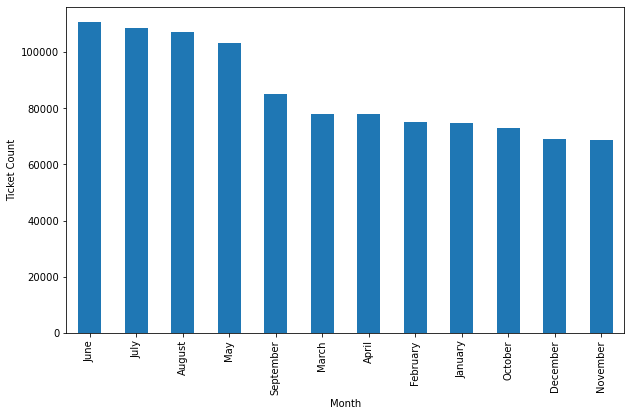

In [171]:
buffReasons['month'].value_counts().plot(kind='bar', xlabel='Month', ylabel='Ticket Count')

<AxesSubplot:xlabel='Week Day', ylabel='Ticket Count'>

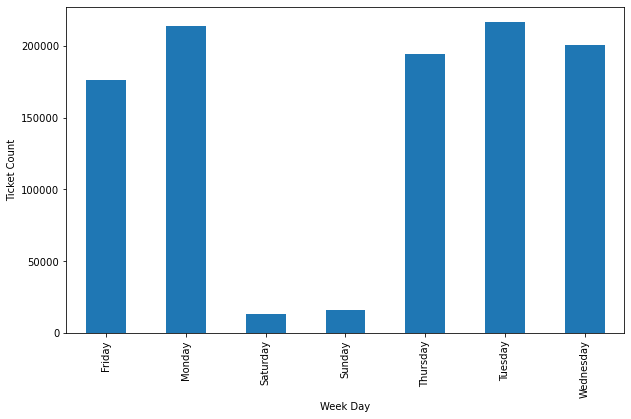

In [172]:
buffReasons['weekDay'].value_counts().sort_index(axis=0).plot(kind='bar', xlabel='Week Day', ylabel='Ticket Count')

<AxesSubplot:xlabel='Season', ylabel='Ticket Count'>

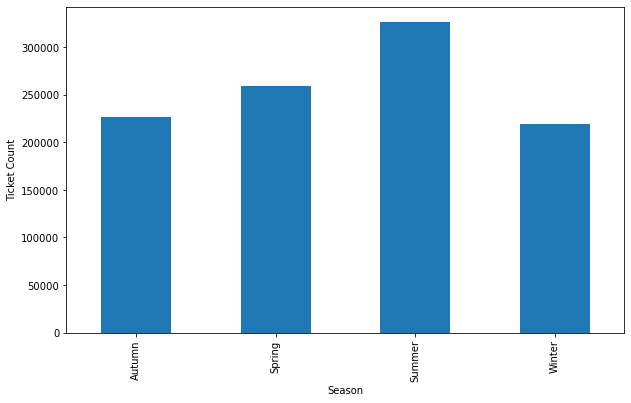

In [173]:
buffReasons['season'].value_counts().sort_index(axis=0).plot(kind = 'bar', xlabel='Season', ylabel='Ticket Count')

The distribution of tickets throughout the year is fairly even. There is a slight decrease in tickets during the colder months. Summer contains the most ticket entries. Additionally, the ticket count Monday through Thursday is very even. There is a slight dip on Fridays and very few entries on Saturday and Sunday. This makes sense because people are less likely to sit down and fill out ticket forms or call about them on weekends or time that is seen as out of business hours. 